# The residuals plot in the paper.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import gridspec

import kepler_kinematics as kek
from scipy.stats import multivariate_normal

plotpar = {'axes.labelsize': 16,
           'font.size': 22,
           'legend.fontsize': 15,
           'xtick.labelsize': 10,
           'ytick.labelsize': 10,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data file.

In [3]:
# df = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")
df = pd.read_csv("../data/data.csv")

Load the results file.

In [19]:
# results = pd.read_csv("../data/all_kepler4.csv")
# results = pd.read_csv("../data/edr3_all.csv")
results = pd.read_csv("../data/test3.csv")
np.shape(results)

(37578, 33)

In [20]:
results

,Unnamed: 0,Unnamed: 0.1,kepid,vx_inferred,vx_inferred_errp,vx_inferred_errm,vx_inferred_err,vx_random,vy_inferred,vy_inferred_errp,...,vxvx_covar,vxvy_covar,vxvz_covar,vxlnd_covar,vyvy_covar,vyvz_covar,vylnd_covar,vzvz_covar,vzlnd_covar,lndlnd_covar
0,0,0,8090398,30.472148,6.110909,5.810513,6.011192,30.544084,210.944238,22.951816,...,36.143464,136.967810,36.139482,0.014640,528.166217,136.986848,-0.029697,36.182596,0.015117,0.000834
1,1,0,8211964,46.087385,6.622497,6.320450,6.529933,45.521940,208.204531,22.013575,...,42.650682,141.999424,51.912150,0.011915,478.130534,173.924826,0.004465,63.416387,0.007430,0.000238
2,2,0,8036098,46.543498,5.493165,5.625119,5.628790,50.847668,221.082809,23.428549,...,31.691203,129.638576,25.052125,0.039418,559.910360,110.194687,-0.009718,21.852775,-0.013717,0.001056
3,3,0,10990438,46.462117,3.232586,3.222006,3.297579,43.430564,228.721283,23.719375,...,10.876745,79.698794,15.367732,0.000698,586.014643,113.123540,-0.002348,21.846289,-0.000932,0.000028
4,4,0,10973458,72.941239,4.194540,4.284885,4.234012,67.583638,228.526883,23.846808,...,17.931343,99.900722,27.223673,0.006512,570.352133,156.187101,-0.001601,42.816700,-0.002556,0.000107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37573,37573,0,4543737,11.312924,7.939284,7.876252,8.018892,6.687694,226.519573,21.949421,...,64.318701,177.646842,50.652723,-0.000335,490.680768,139.907148,-0.001742,39.893270,-0.000414,0.000057
37574,37574,0,8739426,-9.788439,5.927654,6.045780,5.939997,-11.071682,227.281921,22.482635,...,35.292386,133.312548,42.831307,-0.004576,504.574719,162.263294,-0.003591,52.212848,0.001130,0.000204
37575,37575,0,10001312,24.160482,5.019903,4.939071,5.037773,31.514805,227.220191,22.833433,...,25.385508,114.957797,35.459325,0.002726,521.647463,160.972824,-0.000801,49.688184,-0.001282,0.000187
37576,37576,0,4909851,73.608847,7.849787,7.637695,7.795180,73.084344,215.903447,22.547642,...,60.780020,174.194491,45.743641,0.013349,508.131759,133.302685,-0.004353,34.979715,-0.000499,0.000209


Merge the results file and the data file.

In [21]:
adf = pd.merge(df, results, on="kepid", how="right")
np.shape(adf)

(37578, 212)

In [22]:
def resid_plot(vx, vy, vz, vx_inferred, vy_inferred, vz_inferred, vx_inferred_err, vy_inferred_err, vz_inferred_err,
               lndistance_inferred_err, r_est, lndistance_inferred,
               ms=3, alpha=.1, box_size=120):

    fig = plt.figure(figsize=(16, 6), dpi=200)
#     gs = gridspec.GridSpec(2, 3, hspace=.0, wspace=.3, height_ratios=[1, 1])
    gs = gridspec.GridSpec(2, 4, hspace=.0, wspace=.4, height_ratios=[1, 1])

    ax0 = plt.subplot(gs[0, 0])
    xlims = (np.median(vx) - box_size, np.median(vx_inferred) + box_size)
    ax0.plot(vx, vx_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(xlims[0], xlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax0.set_ylim(xlims)
    ax0.set_xlim(xlims)
    ax0.set_ylabel("$\mathrm{V_x~inferred~[kms^{-1}]}$")
    ax0.set_xticklabels([])

    ax1 = plt.subplot(gs[0, 1])
    ylims = (np.median(vy) - box_size, np.median(vy_inferred) + box_size)
    ax1.plot(vy, vy_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(ylims[0], ylims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax1.set_xlim(ylims)
    ax1.set_ylim(ylims)
    ax1.set_ylabel("$\mathrm{V_y~inferred~[kms^{-1}]}$")
    ax1.set_xticklabels([])

    ax2 = plt.subplot(gs[0, 2])
    zlims = (np.median(vz) - box_size, np.median(vz_inferred) + box_size)
    ax2.plot(vz, vz_inferred, "k.", ms=ms, alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(zlims[0], zlims[1], 100)
    plt.plot(xs, xs, "k", ls="--", zorder=1)
    ax2.set_xlim(zlims)
    ax2.set_ylim(zlims)
    ax2.set_ylabel("$\mathrm{V_z~inferred~[kms^{-1}]}$");
    ax2.set_xticklabels([])

    ax6 = plt.subplot(gs[0, 3])
    ax6.plot(r_est, lndistance_inferred, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
#     ax6.errorbar(r_est, lndistance_inferred, fmt="k.", yerr=lndistance_inferred_err, ms=ms+2,
#                  mec="none", alpha=alpha, rasterized=True, zorder=0)
    xs = np.linspace(0, 10, 100)
    ax6.plot(xs, xs, "k", ls="--", zorder=1)
    ax6.set_xlim(0, 10)
    ax6.set_ylim(0, 10)
    ax6.set_ylabel("$\mathrm{Distance~inferred~[kpc]}$")
    ax6.set_xticklabels([])
    
    # Residual panels
    # ---------------------------------------------------------------------------------------------------
    
    ax3 = plt.subplot(gs[1, 0])
#     ax3.errorbar(vx, vx_inferred - vx, yerr=vx_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.plot(vx, vx_inferred - vx, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax3.errorbar(np.median(vx - 40), -30, yerr=np.median(vx_inferred_err), fmt="k.", ms=4, label="$\mathrm{Typical~uncertainty}$")
    ax3.axhline(0, color="k", ls="--", zorder=1)
    ax3.set_ylim(-box_size, box_size)
    ax3.set_xlim(xlims)
    ax3.set_xlabel("$\mathrm{V_x~true~[kms^{-1}]}$")
#     ax3.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax3.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")
    ax3.legend(fontsize=13)

    ax4 = plt.subplot(gs[1, 1])
#     ax4.errorbar(vy, vy_inferred-vy, yerr=vy_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.plot(vy, vy_inferred-vy, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax4.errorbar(np.median(vy - 40), -30, yerr=np.median(vy_inferred_err), fmt="k.", ms=4)
    ax4.axhline(0, color="k", ls="--", zorder=1)
    ax4.set_ylim(-box_size, box_size)
    ax4.set_xlim(ylims)
    ax4.set_xlabel("$\mathrm{V_y~true~[kms^{-1}]}$")
#     ax4.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax4.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")

    ax5 = plt.subplot(gs[1, 2])
#     ax5.errorbar(vz, vz_inferred - vz, yerr=vz_inferred_err, fmt="k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.plot(vz, vz_inferred - vz, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax5.errorbar(np.median(vz - 40), -30, yerr=np.median(vz_inferred_err), fmt="k.", ms=4)
    print("typical vz uncertainty = ", np.median(vz_inferred_err), np.median(vz_inferred_err/vz)*100)
    ax5.axhline(0, color="k", ls="--", zorder=1)
    ax5.set_ylim(-box_size, box_size)
    ax5.set_xlim(zlims)
    ax5.set_xlabel("$\mathrm{V_z~true~[kms^{-1}]}$")
#     ax5.set_ylabel("$\mathrm{Residual~[kms^{-1}]}$")
    ax5.set_ylabel("$\mathrm{Inferred-True~[kms^{-1}]}$")

    ax7 = plt.subplot(gs[1, 3])
#     ax7.errorbar(r_est, lndistance_inferred-r_est, fmt="k.", yerr=lndistance_inferred_err, ms=ms+2,
#                  mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.plot(r_est, lndistance_inferred-r_est, "k.", ms=ms+2, mec="none", alpha=alpha, rasterized=True, zorder=0)
    ax7.errorbar(0, -.1, yerr=np.median(lndistance_inferred_err), fmt="k.", ms=4)
    ax7.axhline(0, color="k", ls="--", zorder=1)
    ax7.set_ylim(-.5, .5)
    ax7.set_xlabel("$\mathrm{Distance~true~[kpc]}$")
    ax7.set_ylabel("$\mathrm{Inferred-True~[kpc]}$")
        
    return fig

379905.90522220865
9790
9790
9790
37578
37578
37578
9790
typical vz uncertainty =  5.443561791673072 9.024495272362373


/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


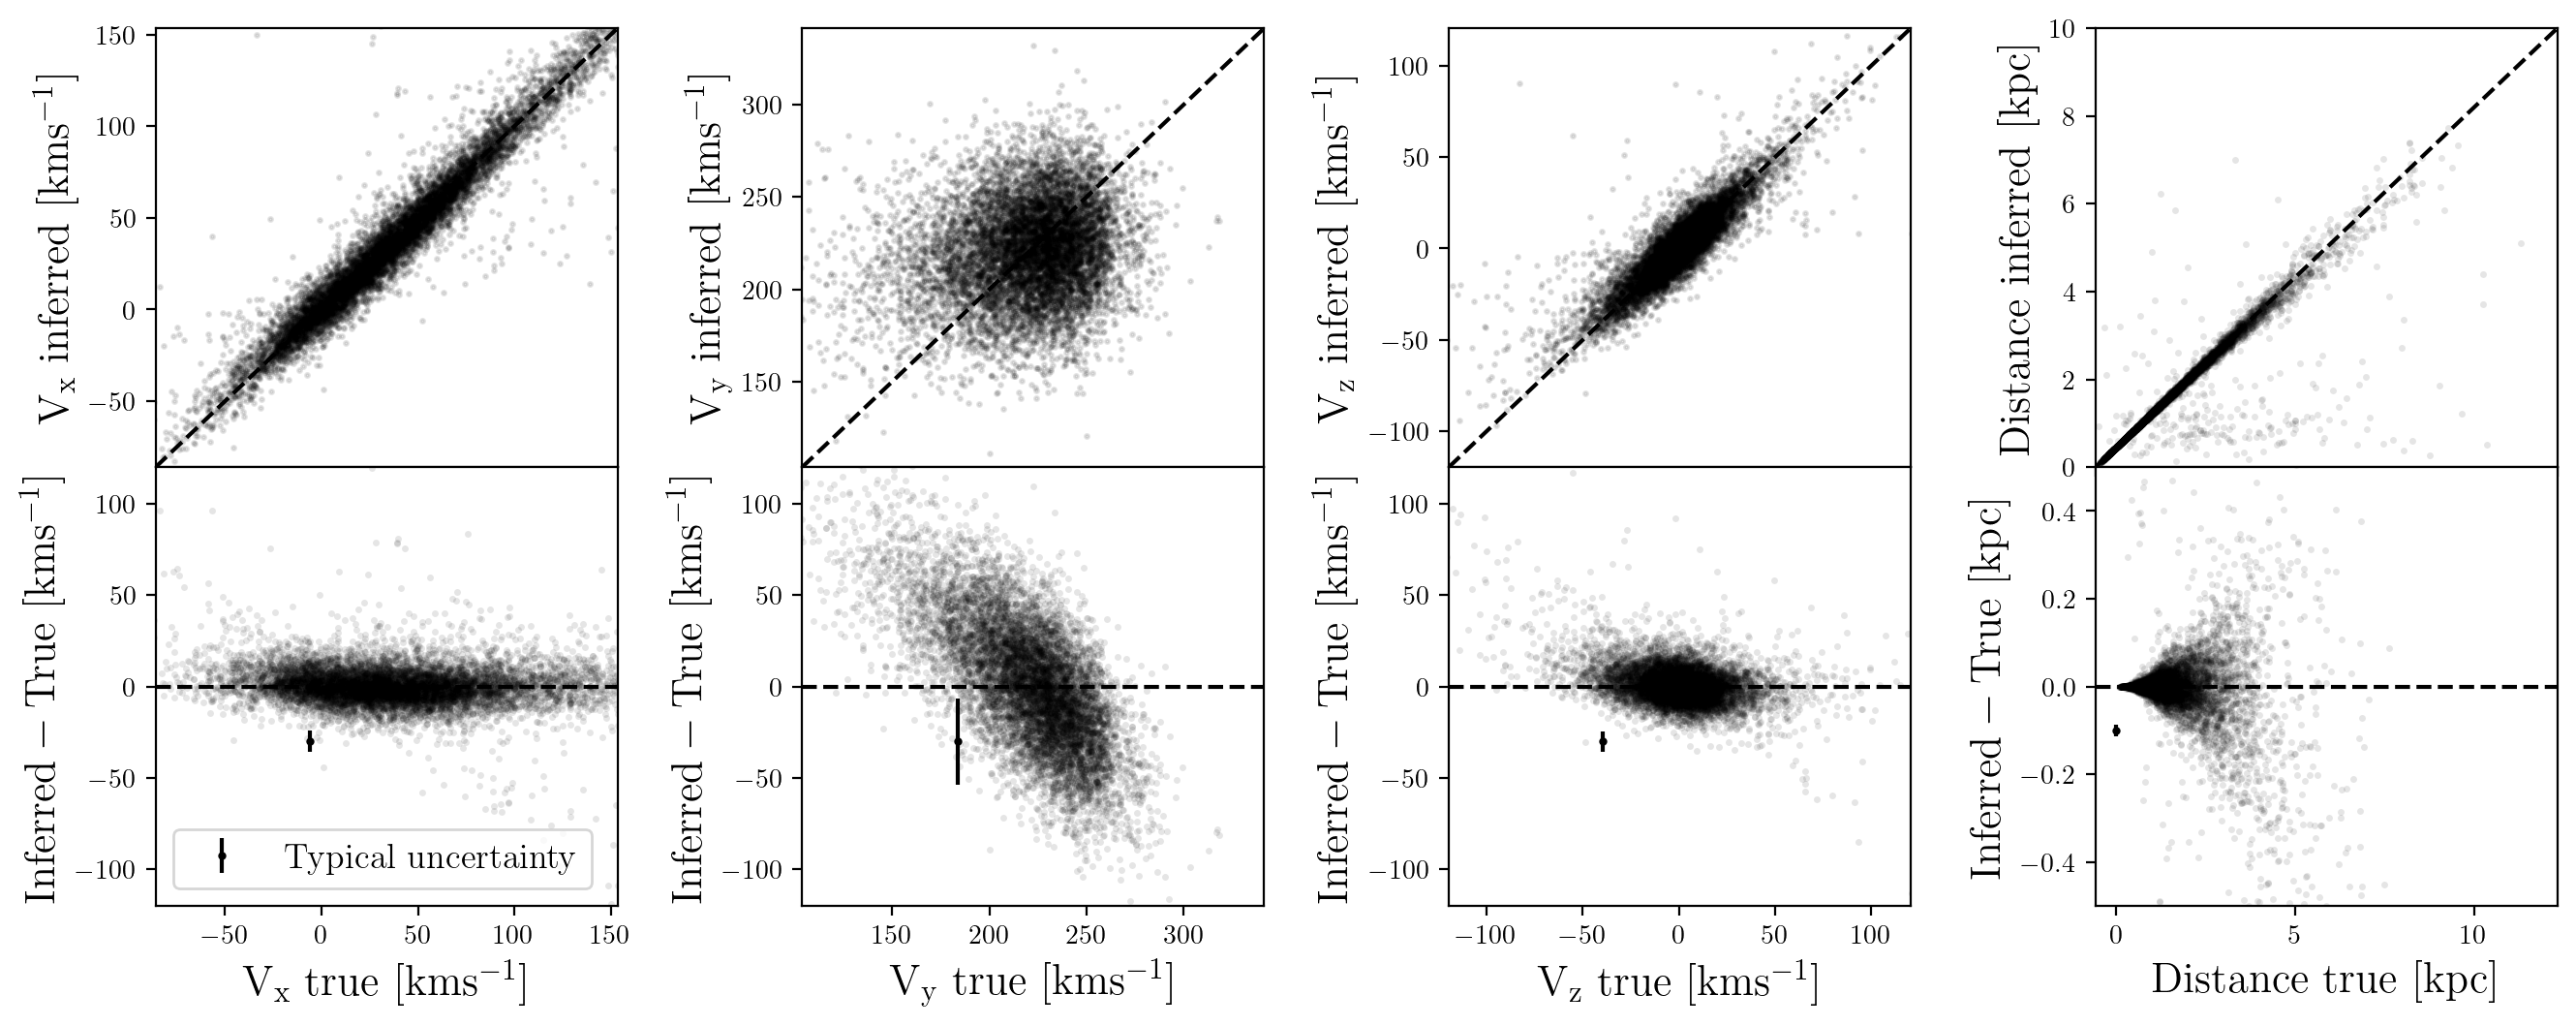

In [23]:
m = np.isfinite(adf.vx.values) & np.isfinite(adf.vy.values) & np.isfinite(adf.vz.values)
m &= np.isfinite(adf.vx_random.values) & np.isfinite(adf.vy_random.values) & np.isfinite(adf.vz_random.values) \
    & np.isfinite(adf.lndistance_random.values)
print(sum(adf.vx.values[m]))
print(sum(np.isfinite(adf.vx.values)))
print(sum(np.isfinite(adf.vy.values)))
print(sum(np.isfinite(adf.vz.values)))
print(sum(np.isfinite(adf.vx_random.values)))
print(sum(np.isfinite(adf.vy_random.values)))
print(sum(np.isfinite(adf.vz_random.values)))
print(sum(m))


fig = resid_plot(adf.vx.values[m], adf.vy.values[m], adf.vz.values[m], adf.vx_random.values[m],
                 adf.vy_random.values[m], adf.vz_random.values[m],
                 adf.vx_inferred_err.values[m], adf.vy_inferred_err.values[m], adf.vz_inferred_err.values[m],
                 adf.lndistance_inferred_err.values[m],
                 adf.r_med_photogeo.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]))
#                  1./adf.parallax_uncorr.values[m], np.exp(adf.lndistance_random.values[m]))
#                  adf.r_med_photogeo.values[m]*1e-3, 1./adf.parallax.values[m])
#                  adf.r_est.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]))


plt.tight_layout()
# plt.savefig("../plots/residuals")
# plt.savefig("../paper/residuals.pdf")

(0.0, 6.0)

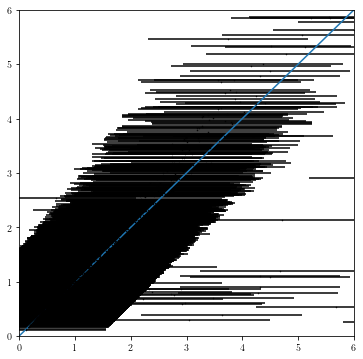

In [88]:
plt.figure(figsize=(6, 6))
# plt.plot(1./adf.parallax_uncorr.values[m], np.exp(adf.lndistance_random.values[m]), "k.", ms=1)
# plt.plot(adf.r_med_photogeo.values[m]*1e-3, 1./adf.parallax.values[m], "k.", ms=1)
plt.errorbar(adf.r_med_photogeo.values[m]*1e-3, np.exp(adf.lndistance_random.values[m]),
             xerr=np.mean([adf.r_lo_photogeo.values[m]*1e-3, adf.r_hi_photogeo.values[m]*1e-3]),
#              xerr=[adf.r_lo_photogeo.values[m]*1e-3, adf.r_hi_photogeo.values[m]*1e-3],
             fmt="k.", ms=1)
#              yerr=adf.lndistance_inferred_err.values[m], fmt="k.", ms=1)

xs = np.linspace(0, 10, 100)
plt.plot(xs, xs)
plt.xlim(0, 6)
plt.ylim(0, 6)

In [85]:
[col for col in adf.columns if "photogeo" in col]
print(adf.r_lo_photogeo)

0        415.944550
1       1667.609497
2       3975.973145
3        352.666443
4        673.099243
           ...     
4995     852.831848
4996    1481.183472
4997    2053.325439
4998     676.265808
4999    2963.287109
Name: r_lo_photogeo, Length: 5000, dtype: float64


In [10]:
print(f"Median vx uncertainty = {np.median(adf.vx_inferred_err):.2f} km/s, {np.median(adf.vx_inferred_err)/np.median(adf.vx_inferred)*100:.2f} %")
print(f"Median vy uncertainty = {np.median(adf.vy_inferred_err):.2f} km/s, {np.median(adf.vy_inferred_err)/np.median(adf.vy_inferred)*100:.2f} %")
print(f"Median vz uncertainty = {np.median(adf.vz_inferred_err):.2f} km/s, {np.median(adf.vz_inferred_err)/np.median(adf.vz_inferred)*100:.2f} %")
print(f"Median lnD uncertainty = {np.median(np.exp(adf.lndistance_inferred_err)):.2f} pc, {np.median(adf.lndistance_inferred_err)*100:.2f} %")

def RMS(y):
    return np.sqrt(np.mean(y**2))

def MAD(y1, y2):
    return np.median(abs(y1-y2))


print(f"vx RMS = {RMS(adf.vx_inferred-adf.vx):.2f} km/s, MAD = {MAD(adf.vx_inferred, adf.vx):.2f}")
print(f"vy RMS = {RMS(adf.vy_inferred-adf.vy):.2f} km/s, MAD = {MAD(adf.vy_inferred, adf.vy):.2f}")
print(f"vz RMS = {RMS(adf.vz_inferred-adf.vz):.2f} km/s, MAD = {MAD(adf.vz_inferred, adf.vz):.2f}")

Median vx uncertainty = 4.49 km/s, 13.85 %
Median vy uncertainty = 17.83 km/s, 7.94 %
Median vz uncertainty = 4.17 km/s, -6736.38 %
Median lnD uncertainty = 1.01 pc, 1.29 %
vx RMS = 16.02 km/s, MAD = nan
vy RMS = 30.78 km/s, MAD = nan
vz RMS = 13.85 km/s, MAD = nan


How many stars lie within 1 sigma?

0.697
0.7356
0.7362
1.0


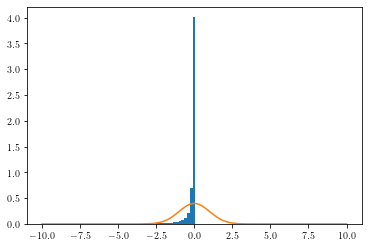

In [11]:
def gauss(x, mu, sig):
    return 1./(sig * np.sqrt(2 * np.pi)) * np.exp(-.5 * (x - mu)**2 / sig**2)

# plt.hist(nsigma[abs(nsigma) < 10], 50, density=True);
# xs = np.linspace(-10, 10, 100)
# plt.plot(xs, gauss(xs, 0, 1))

nsigma = (adf.vx_inferred.values - adf.vx.values)/adf.vx_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.vy_inferred.values - adf.vy.values)/adf.vy_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.vz_inferred.values - adf.vz.values)/adf.vz_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

nsigma = (adf.lndistance_inferred.values - np.log(1./adf.parallax.values))/adf.lndistance_inferred_err.values
print(sum(nsigma <= 1)/float(len(nsigma)))

plt.clf()
plt.hist(nsigma[abs(nsigma) < 10], 50, density=True);
xs = np.linspace(-10, 10, 100)
plt.plot(xs, gauss(xs, 0, 1))

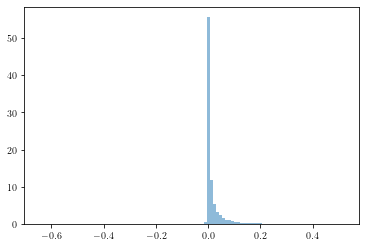

In [72]:
# plt.hist(adf.lndistance_inferred.values, density=True, alpha=.5);
# plt.hist(np.log(1/adf.parallax.values), density=True, alpha=.5);
plt.hist(np.log(1/adf.parallax.values) - adf.lndistance_inferred.values, 100, density=True, alpha=.5);

In [42]:
p = np.zeros(len(adf))
from tqdm import trange
for i in trange(len(adf)):
    cov = [[adf.vx_inferred_err.values[i]**2, 0, 0, 0],
           [0, adf.vy_inferred_err.values[i]**2, 0, 0],
           [0, 0, adf.vz_inferred_err.values[i]**2, 0],
           [0, 0, 0, adf.lndistance_inferred_err.values[i]**2]]
    mvn = multivariate_normal([adf.vx_inferred.values[i], adf.vy_inferred.values[i],
                               adf.vz_inferred.values[i], adf.lndistance_inferred.values[i]], cov)
    p[i] = mvn.pdf([adf.vx.values[i], adf.vy.values[i], adf.vz.values[i], np.log(adf.r_est.values[i]*1e-3)])

100%|██████████| 4987/4987 [00:01<00:00, 3577.65it/s]


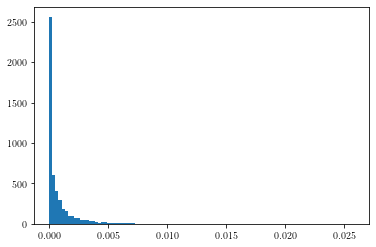

In [43]:
plt.hist(p, 100);

In [41]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
def gauss(x, mu, sig):
    return 1./(sig * np.sqrt(2 * np.pi)) * np.exp(-.5 * (x - mu)**2 / sig**2)

0.24197072451914337


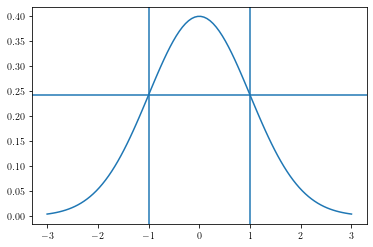

In [44]:
xs = np.linspace(-3, 3, 100)
plt.plot(xs, gauss(xs, 0, 1))
plt.axvline(1)
plt.axvline(-1)
plt.axhline(gauss(1., 0., 1.))
print(gauss(1., 0., 1.))